# Linear regression model for Medical cost dataset
We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

## Definition & Working principle

### Let's build model using Linear regression.

Linear regression is a supervised learining algorithm used when target / dependent variable continues real number. It establishes relationship between dependent variable y
and one or more independent variable x using best fit line. It work on the principle of ordinary least square (OLS) / Mean square errror (MSE). In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.

### Hypothesis representation
We will use xi to denote the independent variable and yi to denote dependent variable. A pair of $ (x_i,y_i) $ is called training example. The subscripe i in the notation is simply index into the training set. We have m training example then $ i=1,2,3,...m. $

The goal of supervised learning is to learn a hypothesis function h
, for a given training set that can used to estimate y. based on x. So hypothesis fuction represented as

$ h_θ(xi)=θ_0+θ_1x_i $

$ θ_0,θ_1 $ are parameter of hypothesis.This is equation for Simple / Univariate Linear regression.

For Multiple Linear regression more than one independent variable exit then we will use $x_ij$
to denote indepedent variable and yi to denote dependent variable. We have n independent variable then j=1,2,3.....n

. The hypothesis function represented as

hθ(xi)=θ0+θ1xi1+θ2xi2+.....θjxij......θnxmn
θ0,θ1,....θj....θn are parameter of hypothesis, m Number of training exaples, n Number of independent variable, xij is ith training exaple of jth feature.

In [ ]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-v0_8-whitegrid')



In [56]:
# Import dataset
#path ='dataset/'
path = 'data/'
df = pd.read_csv(path+'insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [59]:
df.duplicated().sum()

1

In [60]:
df['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [61]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

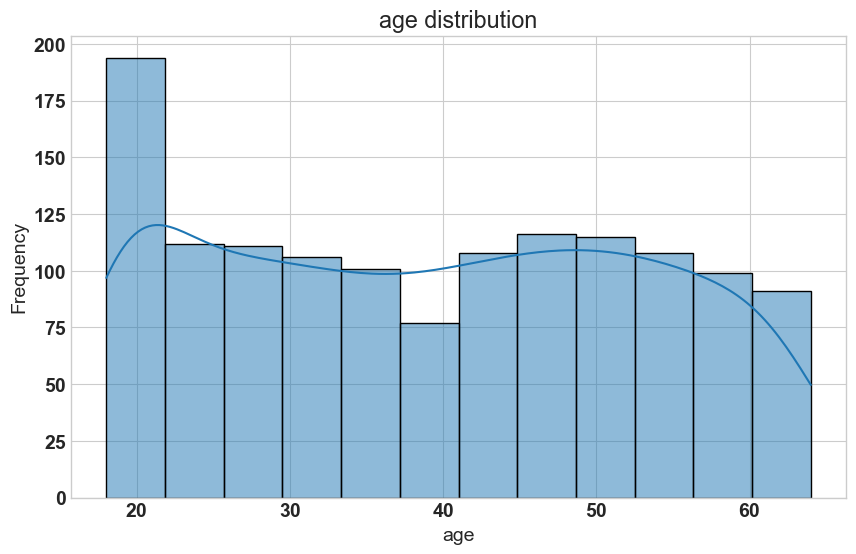

In [62]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'],bins='auto',kde=True)
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("Frequency")
plt.show()

C:\Users\dujtep\AppData\Local\Temp\ipykernel_26700\4291764364.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sex_counts, x='sex', y='count', palette=sns.color_palette("rocket"))
C:\Users\dujtep\AppData\Local\Temp\ipykernel_26700\4291764364.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=sex_counts, x='sex', y='count', palette=sns.color_palette("rocket"))


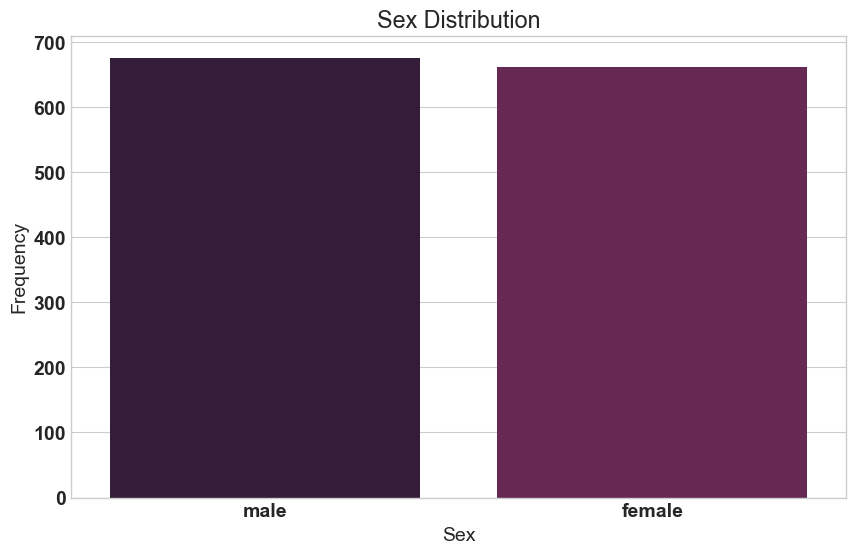

,sex,count
0,male,676
1,female,662


In [72]:
sex_counts = df['sex'].value_counts().reset_index()
sex_counts.columns = ['sex', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=sex_counts, x='sex', y='count', palette=sns.color_palette("rocket"))
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()
sex_counts

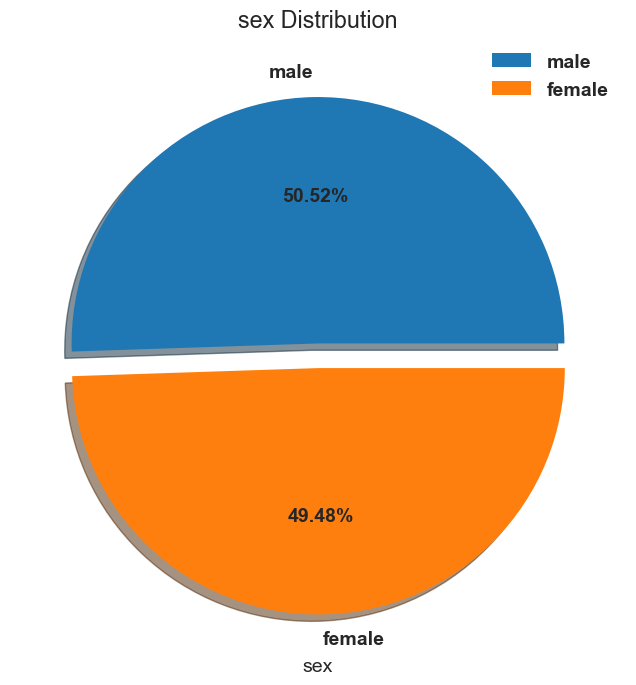

In [66]:
plt.figure(figsize=(10, 8))
plt.pie(df['sex'].value_counts(),
        explode=[0,0.1],
        labels=df['sex'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('sex Distribution')
plt.xlabel('sex')
plt.legend()
plt.show()

In [73]:
df['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

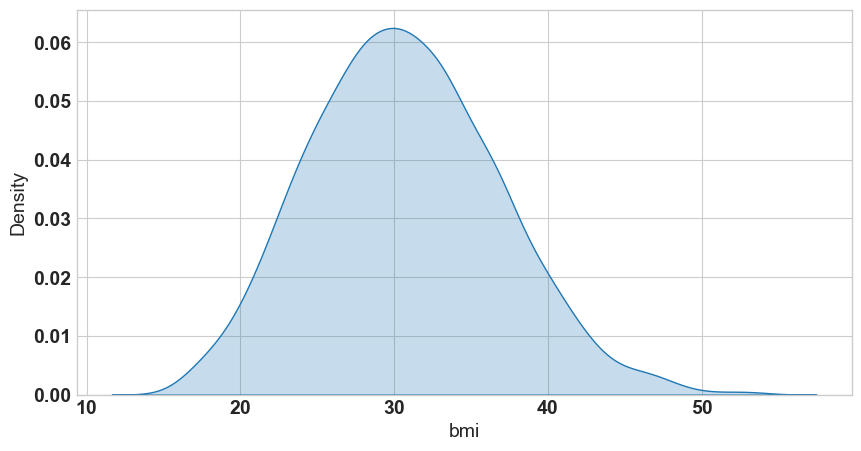

In [75]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['bmi'],fill=True)
plt.show()

< 18.5 Underweight

18.5 – 24.9 Normal (Healthy)

25 – 29.9 Overweight

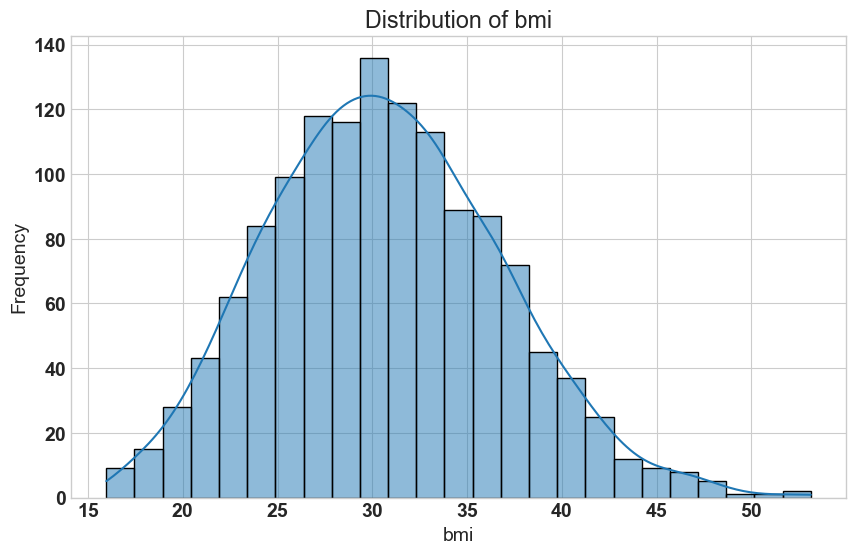

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'],bins='auto', kde=True)  
plt.title('Distribution of bmi')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.show()



In [80]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

C:\Users\dujtep\AppData\Local\Temp\ipykernel_26700\1274946791.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=children_counts, x='children', y='count', palette=sns.color_palette("YlOrBr"))


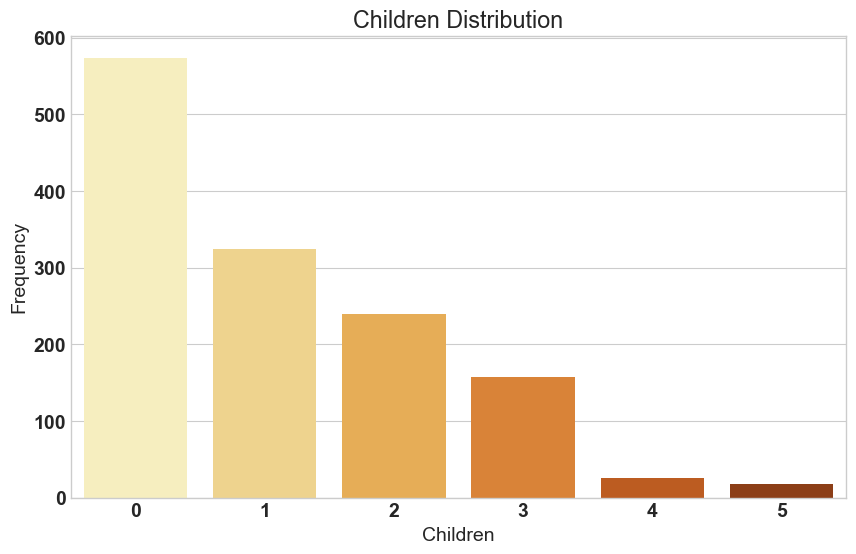

,sex,count
0,male,676
1,female,662


In [83]:
children_counts = df['children'].value_counts().reset_index()
children_counts.columns = ['children', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=children_counts, x='children', y='count', palette=sns.color_palette("YlOrBr"))
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.show()
sex_counts

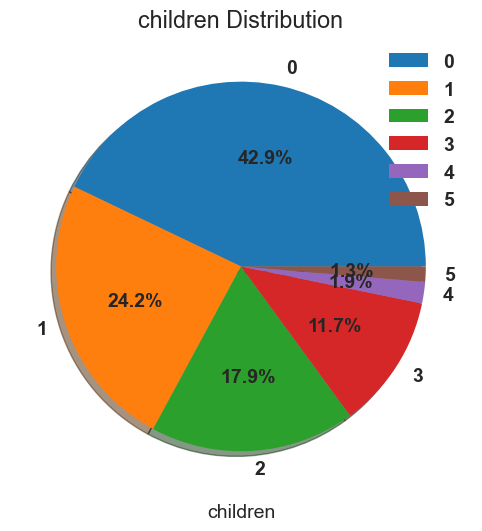

In [87]:
plt.figure(figsize=(10, 6))
plt.pie(df['children'].value_counts(),
    explode=[0,0,0,0,0,0],
    labels=df['children'].value_counts().index,
    shadow=True, autopct="%1.1f%%")
plt.title('children Distribution')
plt.xlabel('children')
plt.legend()
plt.show()

In [88]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\dujtep\AppData\Local\Temp\ipykernel_26700\545092087.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=smoker_counts, x='smoker', y='count', palette=sns.color_palette("rocket"))
C:\Users\dujtep\AppData\Local\Temp\ipykernel_26700\545092087.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=smoker_counts, x='smoker', y='count', palette=sns.color_palette("rocket"))


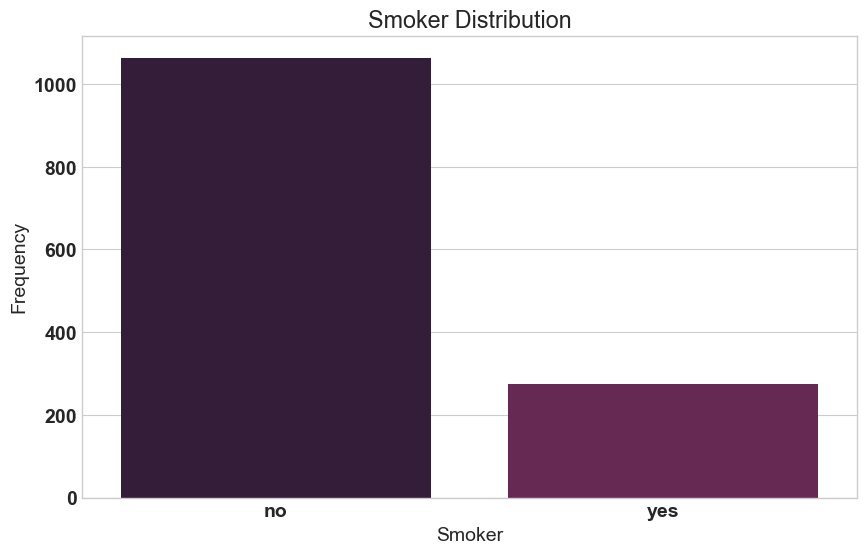

In [91]:
smoker_counts = df['smoker'].value_counts().reset_index()
smoker_counts.columns = ['smoker', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=smoker_counts, x='smoker', y='count', palette=sns.color_palette("rocket"))
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.show()

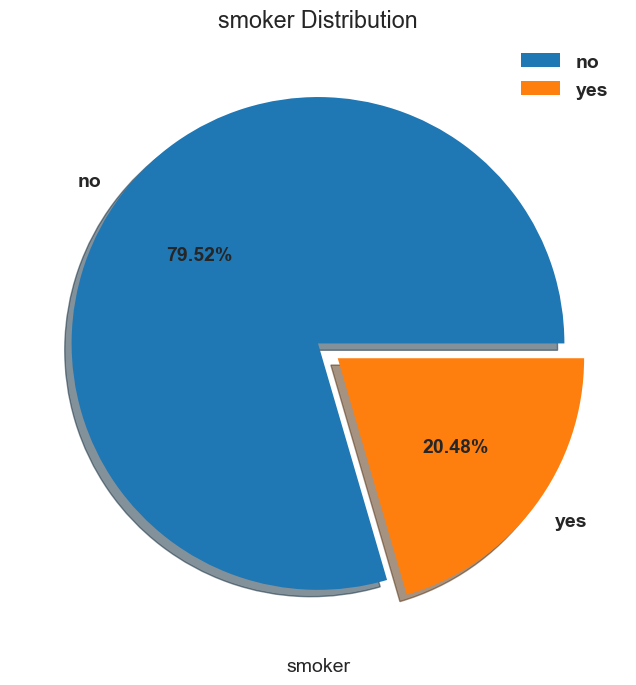

In [92]:
plt.figure(figsize=(10, 8))
plt.pie(df['smoker'].value_counts(),
        explode=[0,0.1],
        labels=df['smoker'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('smoker Distribution')
plt.xlabel('smoker')
plt.legend()
plt.show()

In [93]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [94]:
df['region'].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

C:\Users\dujtep\AppData\Local\Temp\ipykernel_26700\1329957035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_counts, x='region', y='count', palette=sns.color_palette("YlOrBr"))
C:\Users\dujtep\AppData\Local\Temp\ipykernel_26700\1329957035.py:5: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(data=region_counts, x='region', y='count', palette=sns.color_palette("YlOrBr"))


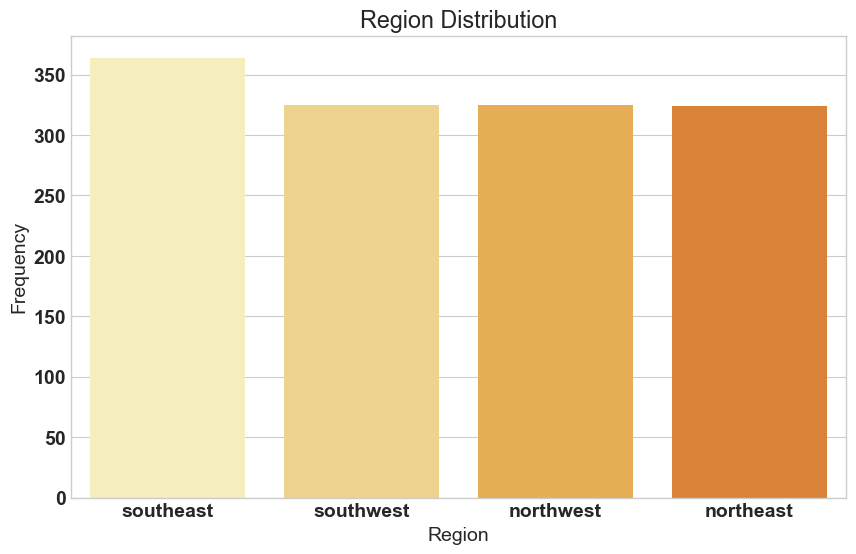

In [95]:
region_counts = df['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=region_counts, x='region', y='count', palette=sns.color_palette("YlOrBr"))
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()



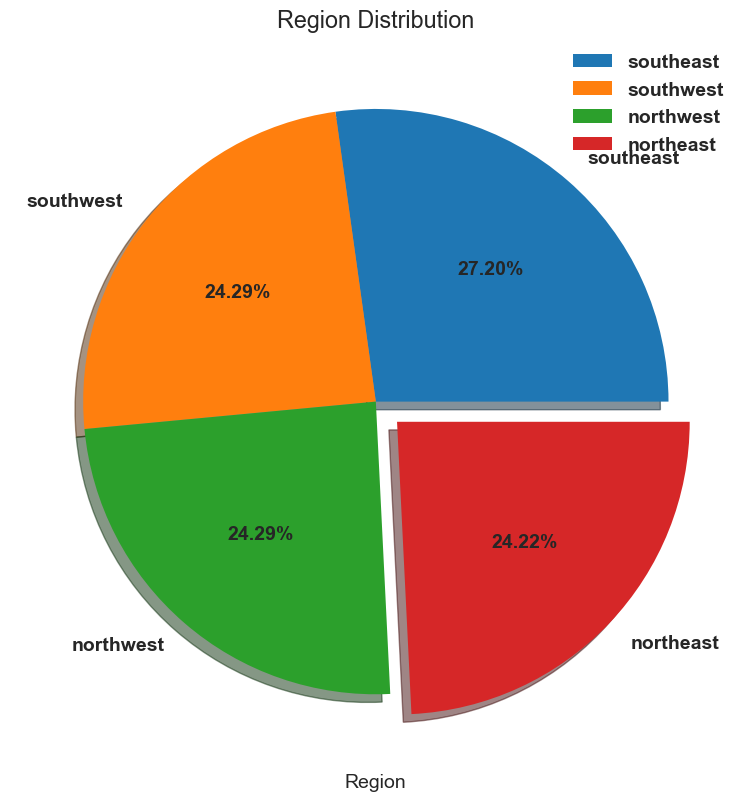

In [97]:
plt.figure(figsize=(10, 8))
plt.pie(df['region'].value_counts(),
        explode=[0,0,0,0.1],
        labels=df['region'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('Region Distribution')
plt.tight_layout()
plt.xlabel('Region')
plt.legend()
plt.show()

In [98]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

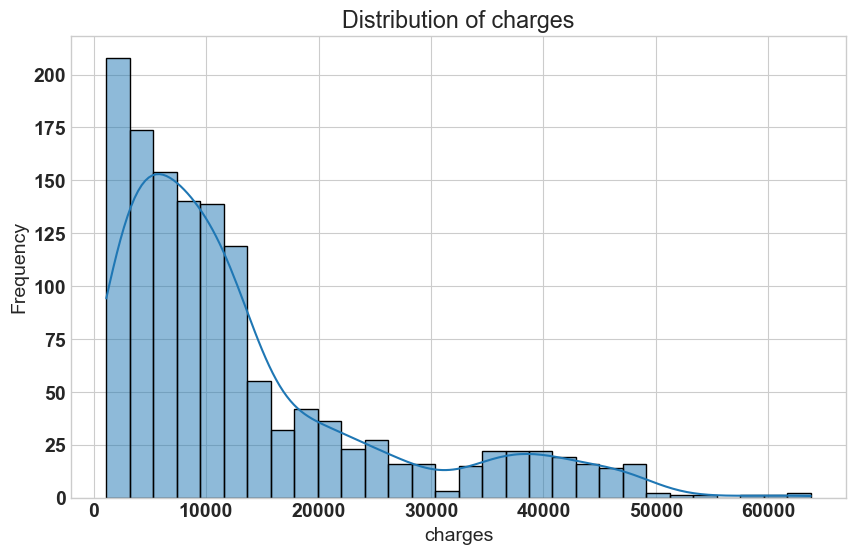

In [100]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'],bins='auto', kde=True)  
plt.title('Distribution of charges')
plt.xlabel('charges')
plt.ylabel('Frequency')
plt.show()

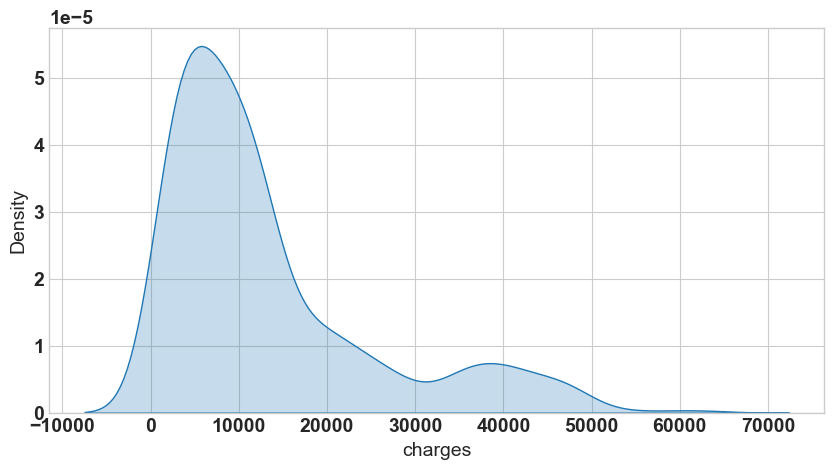

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['charges'],fill=True)
plt.show()